In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('pollutants.csv')

In [3]:
df.head()

,reference_year,model_year,fuel_type,ef,pollutant,lower_speed_interval,upper_speed_interval,data_from
0,2010,1982,D,0.349365,CH4,0.0,8.0,Californa
1,2010,1982,D,0.263701,CH4,9.0,16.0,Californa
2,2010,1982,D,0.133710,CH4,17.0,24.0,Californa
3,2010,1982,D,0.058837,CH4,25.0,32.0,Californa
4,2010,1982,D,0.040486,CH4,33.0,40.0,Californa


In [4]:
df.tail()

,reference_year,model_year,fuel_type,ef,pollutant,lower_speed_interval,upper_speed_interval,data_from
277337,2022,2022,G,0.048129,VOC,84.5,92.5,Detroit
277338,2022,2022,G,0.053466,VOC,92.5,100.6,Detroit
277339,2022,2022,G,0.088261,VOC,100.6,108.6,Detroit
277340,2022,2022,G,0.120495,VOC,108.6,116.7,Detroit
277341,2022,2022,G,0.141892,VOC,116.7,120.7,Detroit


In [5]:
df.shape

(277342, 8)

In [6]:
df.columns

Index(['reference_year', 'model_year', 'fuel_type', 'ef', 'pollutant',
       'lower_speed_interval', 'upper_speed_interval', 'data_from'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

reference_year          0
model_year              0
fuel_type               0
ef                      0
pollutant               0
lower_speed_interval    0
upper_speed_interval    0
data_from               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277342 entries, 0 to 277341
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   reference_year        277342 non-null  int64  
 1   model_year            277342 non-null  int64  
 2   fuel_type             277342 non-null  object 
 3   ef                    277342 non-null  float64
 4   pollutant             277342 non-null  object 
 5   lower_speed_interval  277342 non-null  float64
 6   upper_speed_interval  277342 non-null  float64
 7   data_from             277342 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 16.9+ MB


In [10]:
df.describe()

,reference_year,model_year,ef,lower_speed_interval,upper_speed_interval
count,277342.000000,277342.000000,2.773420e+05,277342.000000,277342.000000
mean,2017.307526,2004.189975,7.049498e+05,55.599380,63.028651
std,3.222430,8.661928,4.163305e+06,35.620322,35.614215
min,2010.000000,1982.000000,9.920000e-06,0.000000,4.000000
25%,2015.000000,1997.000000,1.128088e-02,25.000000,32.000000
50%,2017.000000,2005.000000,1.480389e-01,54.650000,62.200000
75%,2020.000000,2011.000000,3.545675e+00,84.500000,92.500000
max,2022.000000,2022.000000,8.541058e+07,116.700000,120.700000


In [11]:
df.nunique()

reference_year             13
model_year                 41
fuel_type                   3
ef                      95626
pollutant                  20
lower_speed_interval       29
upper_speed_interval       30
data_from                   2
dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import numpy as np

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
object_cols = df.select_dtypes(include='object')
num_cols = df.select_dtypes(include=['float', 'int'])

In [16]:
object_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=object_cols)

In [17]:
df_encoded.head()

,reference_year,model_year,ef,lower_speed_interval,upper_speed_interval,fuel_type_CNG,fuel_type_D,fuel_type_G,pollutant_CH4,pollutant_CO,...,pollutant_PM10,pollutant_PM25,pollutant_ROG,pollutant_SO2,pollutant_SOX,pollutant_THC,pollutant_TOG,pollutant_VOC,data_from_Californa,data_from_Detroit
0,2010,1982,0.349365,0.0,8.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2010,1982,0.263701,9.0,16.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2010,1982,0.133710,17.0,24.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,2010,1982,0.058837,25.0,32.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,2010,1982,0.040486,33.0,40.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
df_corr = df_encoded.corr()

In [19]:
df_corr

,reference_year,model_year,ef,lower_speed_interval,upper_speed_interval,fuel_type_CNG,fuel_type_D,fuel_type_G,pollutant_CH4,pollutant_CO,...,pollutant_PM10,pollutant_PM25,pollutant_ROG,pollutant_SO2,pollutant_SOX,pollutant_THC,pollutant_TOG,pollutant_VOC,data_from_Californa,data_from_Detroit
reference_year,1.000000,0.253186,0.066637,0.026941,0.030087,0.020473,-0.047026,0.028299,-0.049428,-0.049428,...,-0.049428,-0.049428,-0.170090,0.081107,-0.143195,0.081107,-0.049428,0.081107,-0.617909,0.617909
model_year,0.253186,1.000000,0.006521,-0.000651,-0.000727,0.069919,-0.087191,0.021820,0.002238,0.002238,...,0.002238,0.002238,0.004825,-0.001222,-0.004270,-0.001222,0.002238,-0.001222,0.014932,-0.014932
ef,0.066637,0.006521,1.000000,-0.066339,-0.067989,0.043532,-0.016570,-0.024857,-0.046673,-0.046672,...,-0.046673,-0.046673,-0.029511,-0.035070,-0.024338,-0.035070,-0.046673,-0.035070,-0.107034,0.107034
lower_speed_interval,0.026941,-0.000651,-0.066339,1.000000,0.999468,-0.000019,-0.001304,0.001348,-0.003510,-0.003510,...,-0.003510,-0.003510,-0.012019,0.005709,-0.009913,0.005709,-0.003510,0.005709,-0.043600,0.043600
upper_speed_interval,0.030087,-0.000727,-0.067989,0.999468,1.000000,-0.000022,-0.001457,0.001505,-0.003920,-0.003920,...,-0.003920,-0.003920,-0.013423,0.006376,-0.011070,0.006376,-0.003920,0.006376,-0.048692,0.048692
fuel_type_CNG,0.020473,0.069919,0.043532,-0.000019,-0.000022,1.000000,-0.490334,-0.459199,0.014457,0.014457,...,0.014457,0.014457,0.008647,0.011284,-0.092047,0.011284,0.014457,0.011284,0.000444,-0.000444
fuel_type_D,-0.047026,-0.087191,-0.016570,-0.001304,-0.001457,-0.490334,1.000000,-0.549053,-0.004728,-0.004728,...,-0.004728,-0.004728,0.003807,-0.009340,0.054798,-0.009340,-0.004728,-0.009340,0.029915,-0.029915
fuel_type_G,0.028299,0.021820,-0.024857,0.001348,0.001505,-0.459199,-0.549053,1.000000,-0.009046,-0.009046,...,-0.009046,-0.009046,-0.012172,-0.001301,0.032417,-0.001301,-0.009046,-0.001301,-0.030917,0.030917
pollutant_CH4,-0.049428,0.002238,-0.046673,-0.003510,-0.003920,0.014457,-0.004728,-0.009046,1.000000,-0.075978,...,-0.075978,-0.075978,-0.048040,-0.057090,-0.039620,-0.057090,-0.075978,-0.057090,0.080507,-0.080507
pollutant_CO,-0.049428,0.002238,-0.046672,-0.003510,-0.003920,0.014457,-0.004728,-0.009046,-0.075978,1.000000,...,-0.075978,-0.075978,-0.048040,-0.057090,-0.039620,-0.057090,-0.075978,-0.057090,0.080507,-0.080507


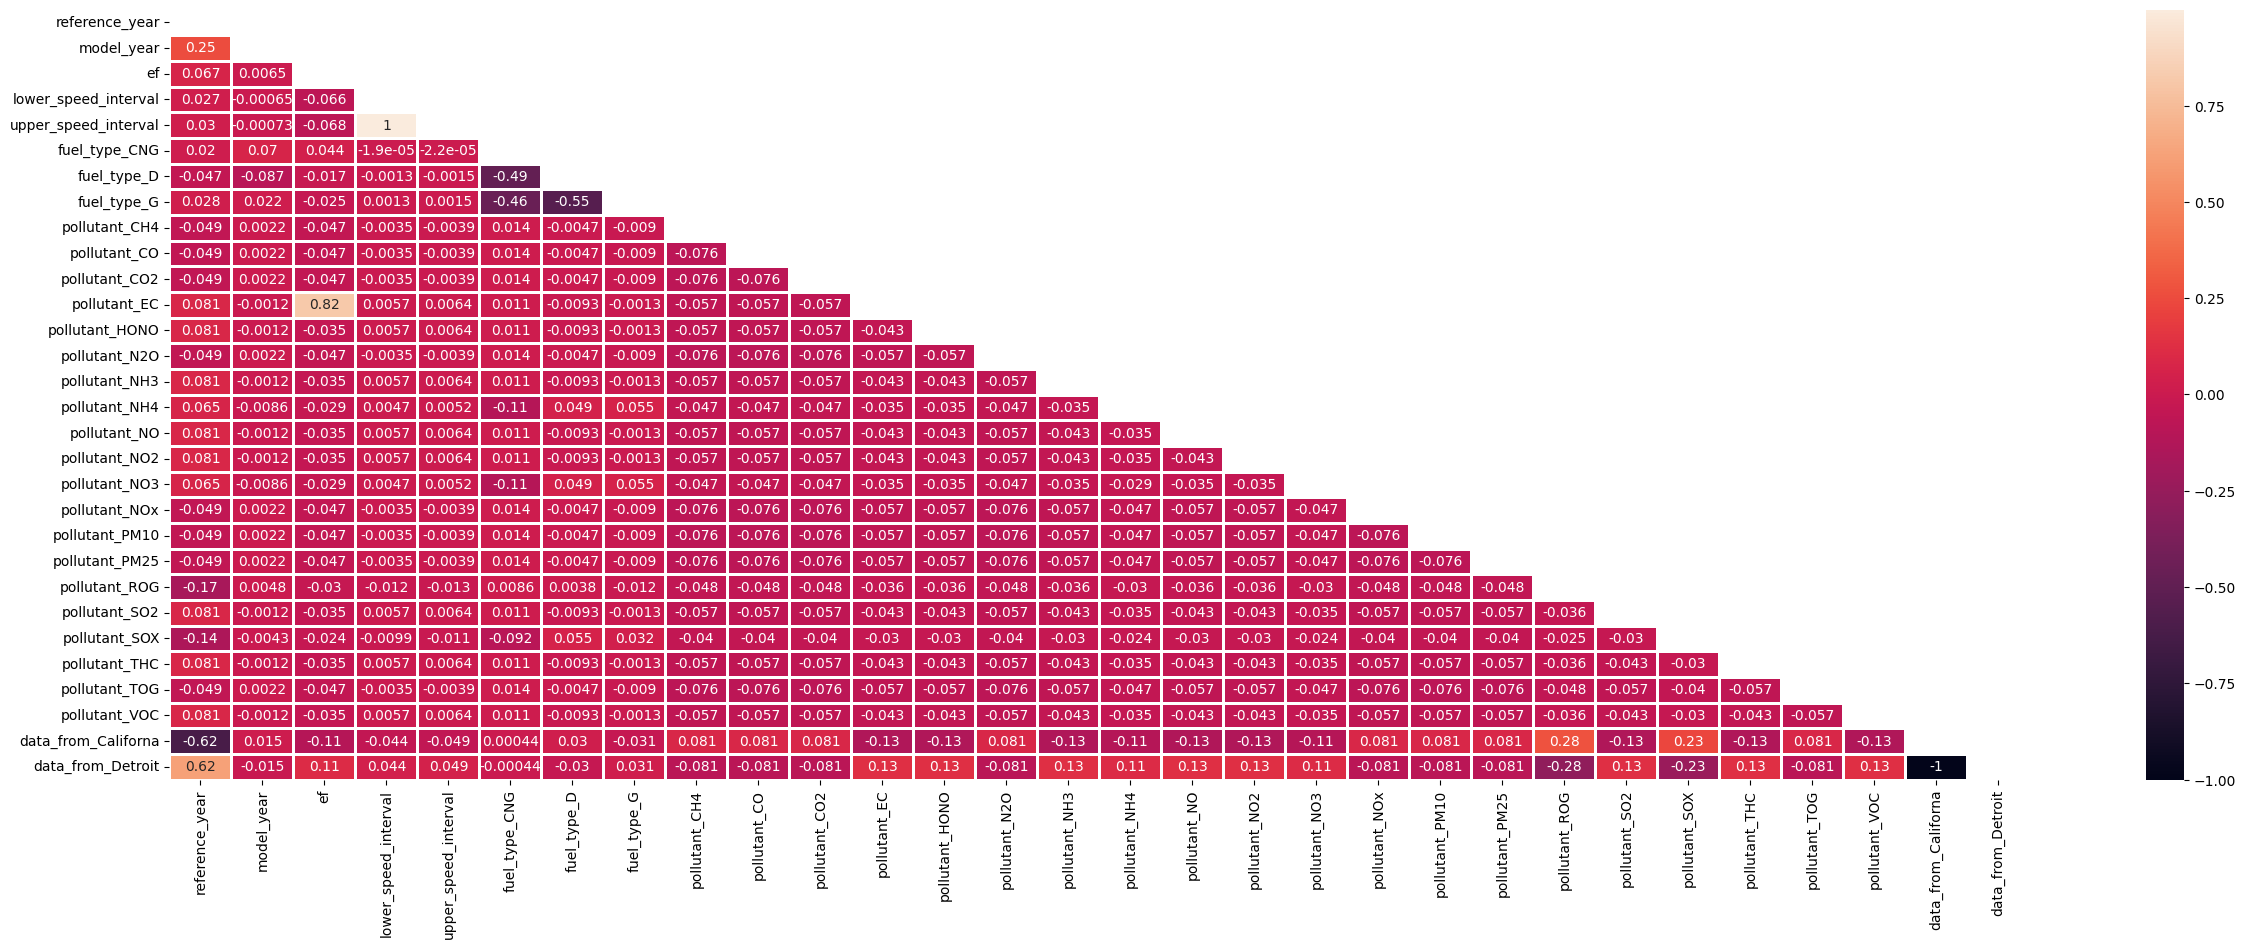

In [20]:
plt.figure(figsize=(30, 10))
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap="rocket");
plt.show()

In [21]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277342 entries, 0 to 277341
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   reference_year        277342 non-null  int64  
 1   model_year            277342 non-null  int64  
 2   ef                    277342 non-null  float64
 3   lower_speed_interval  277342 non-null  float64
 4   upper_speed_interval  277342 non-null  float64
 5   fuel_type_CNG         277342 non-null  uint8  
 6   fuel_type_D           277342 non-null  uint8  
 7   fuel_type_G           277342 non-null  uint8  
 8   pollutant_CH4         277342 non-null  uint8  
 9   pollutant_CO          277342 non-null  uint8  
 10  pollutant_CO2         277342 non-null  uint8  
 11  pollutant_EC          277342 non-null  uint8  
 12  pollutant_HONO        277342 non-null  uint8  
 13  pollutant_N2O         277342 non-null  uint8  
 14  pollutant_NH3         277342 non-null  uint8  
 15  

In [22]:
df_encoded.columns

Index(['reference_year', 'model_year', 'ef', 'lower_speed_interval',
       'upper_speed_interval', 'fuel_type_CNG', 'fuel_type_D', 'fuel_type_G',
       'pollutant_CH4', 'pollutant_CO', 'pollutant_CO2', 'pollutant_EC',
       'pollutant_HONO', 'pollutant_N2O', 'pollutant_NH3', 'pollutant_NH4',
       'pollutant_NO', 'pollutant_NO2', 'pollutant_NO3', 'pollutant_NOx',
       'pollutant_PM10', 'pollutant_PM25', 'pollutant_ROG', 'pollutant_SO2',
       'pollutant_SOX', 'pollutant_THC', 'pollutant_TOG', 'pollutant_VOC',
       'data_from_Californa', 'data_from_Detroit'],
      dtype='object')

In [23]:
df_encoded_1 = df_encoded.copy()

In [24]:
from sklearn.ensemble import ExtraTreesRegressor

# separate the target variable from the feature set
X = df_encoded_1.drop('ef', axis=1)
y = df_encoded_1['ef']

# train the Extra Trees Regressor model
model = ExtraTreesRegressor()
model.fit(X, y)

# get the feature importance scores and sort them in descending order
feature_importance = list(model.feature_importances_)
feature_importance_sorted = sorted(zip(feature_importance, X.columns), reverse=True)

# print the top ten important features
print("Top ten important features:")
for i in range(10):
    print(f"{i+1}. {feature_importance_sorted[i][1]} - {feature_importance_sorted[i][0]:.4f}")

Top ten important features:
1. pollutant_EC - 0.6682
2. upper_speed_interval - 0.1418
3. lower_speed_interval - 0.1179
4. fuel_type_CNG - 0.0477
5. model_year - 0.0201
6. fuel_type_D - 0.0028
7. fuel_type_G - 0.0013
8. reference_year - 0.0001
9. pollutant_CO2 - 0.0000
10. data_from_Californa - 0.0000


In [25]:
df2 = df[['reference_year', 'ef']]

In [26]:
df2

,reference_year,ef
0,2010,0.349365
1,2010,0.263701
2,2010,0.133710
3,2010,0.058837
4,2010,0.040486
...,...,...
277337,2022,0.048129
277338,2022,0.053466
277339,2022,0.088261
277340,2022,0.120495


In [27]:
mean_ef = df2.groupby('reference_year')['ef'].mean()

In [28]:
mean_ef

reference_year
2010       106.718283
2011       110.901566
2012       110.630297
2013       112.242245
2014       108.411974
2015    708893.620329
2016    782760.478127
2017    788349.288223
2018    987978.741200
2019    796463.553292
2020    795112.640147
2021    988998.780819
2022    992972.298005
Name: ef, dtype: float64

In [29]:
df_mean = pd.DataFrame({'ef_mean': mean_ef})

In [30]:
df_mean.index = df_mean.index.astype(str)

In [31]:
df_mean.index.name = 'year'

In [32]:
df_mean

,ef_mean
year,
2010,106.718283
2011,110.901566
2012,110.630297
2013,112.242245
2014,108.411974
2015,708893.620329
2016,782760.478127
2017,788349.288223
2018,987978.741200


In [33]:
df_mean['SMA_10'] = df_mean.ef_mean.rolling(10, min_periods=1).mean()
df_mean['SMA_20'] = df_mean.ef_mean.rolling(20, min_periods=1).mean()

In [34]:
colors = ['green', 'red', 'orange']

In [35]:
import matplotlib.pyplot as plt

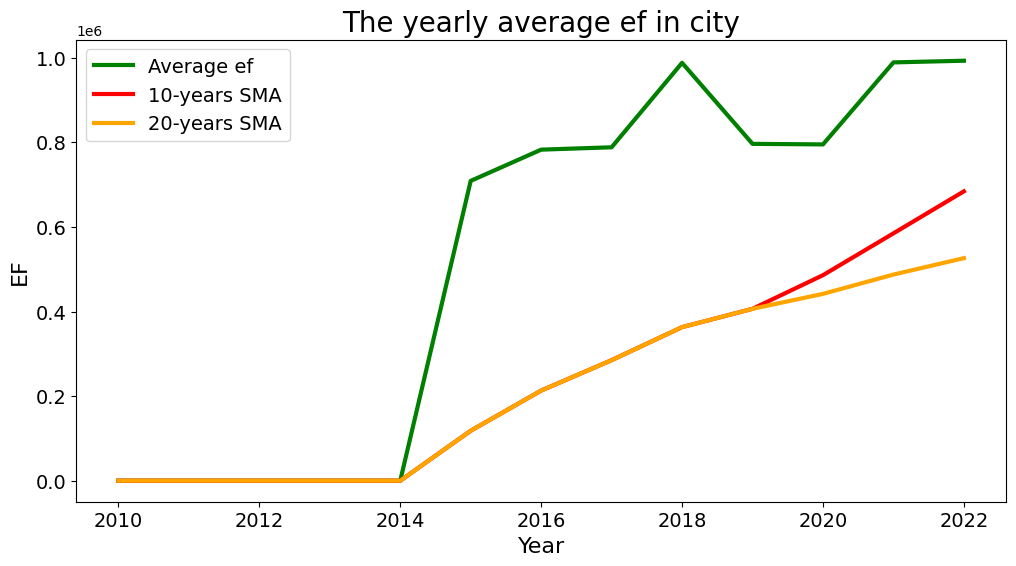

In [36]:
df_mean.plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average ef', '10-years SMA', '20-years SMA'], fontsize=14)
plt.title('The yearly average ef in city', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('EF', fontsize=16)
plt.show()

In [37]:
df_mean['CMA'] = df_mean.ef_mean.expanding().mean()

In [38]:
colors = ['green', 'orange']

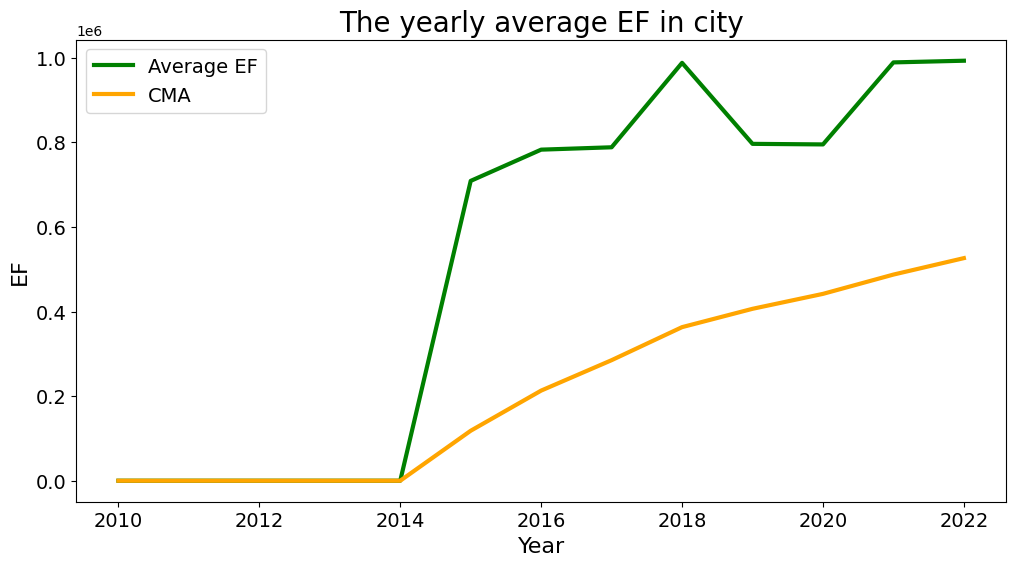

In [39]:
df_mean[['ef_mean', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average EF', 'CMA'], fontsize=14)
plt.title('The yearly average EF in city', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('EF', fontsize=16)
plt.show()

In [40]:
df_mean['EMA_0.1'] = df_mean.ef_mean.ewm(alpha=0.1, adjust=False).mean()
df_mean['EMA_0.3'] = df_mean.ef_mean.ewm(alpha=0.3, adjust=False).mean()

In [41]:
colors = ['green', 'red', 'yellow']

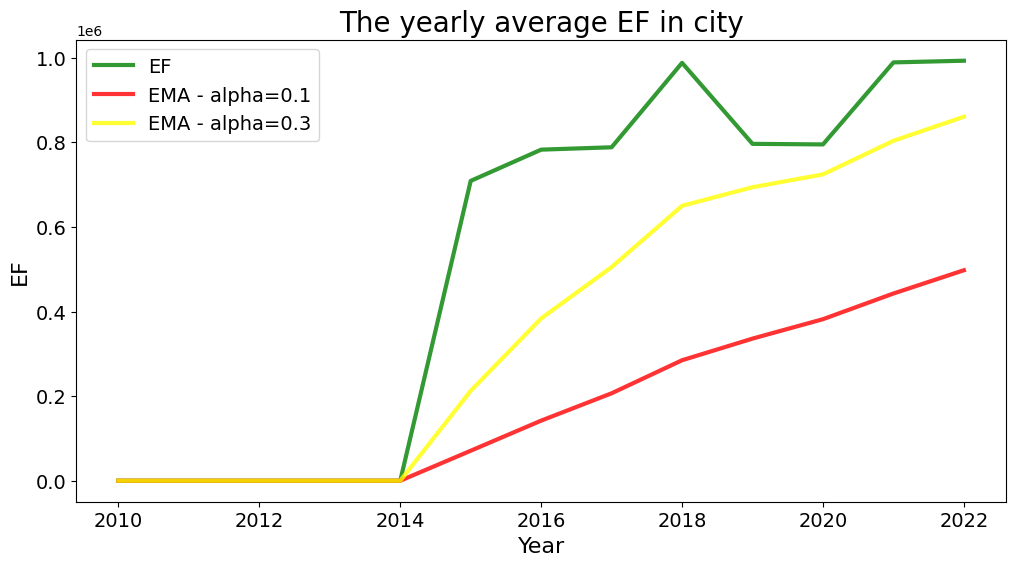

In [42]:
df_mean[['ef_mean', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['EF', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)
plt.title('The yearly average EF in city', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('EF', fontsize=16)
plt.show()

In [43]:
df_mean

,ef_mean,SMA_10,SMA_20,CMA,EMA_0.1,EMA_0.3
year,,,,,,
2010,106.718283,106.718283,106.718283,106.718283,106.718283,106.718283
2011,110.901566,108.809925,108.809925,108.809925,107.136612,107.973268
2012,110.630297,109.416715,109.416715,109.416715,107.485980,108.770377
2013,112.242245,110.123098,110.123098,110.123098,107.961607,109.811937
2014,108.411974,109.780873,109.780873,109.780873,108.006643,109.391948
2015,708893.620329,118240.420782,118240.420782,118240.420782,70986.568012,212744.660462
2016,782760.478127,213171.857546,213171.857546,213171.857546,142163.959023,383749.405762
2017,788349.288223,285069.036380,285069.036380,285069.036380,206782.491943,505129.370500
2018,987978.741200,363170.114694,363170.114694,363170.114694,284902.116869,649984.181710


In [44]:
df_mean_1 = df_mean[['ef_mean']]

In [45]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_mean_1['ef_mean'])
print("ADF Test p-value:", adf_test[1])

if adf_test[1] < 0.05:
    print("Data is stationary")
else:
    print("Data is non-stationary, taking first difference")

ADF Test p-value: 3.531101454322206e-05
Data is stationary


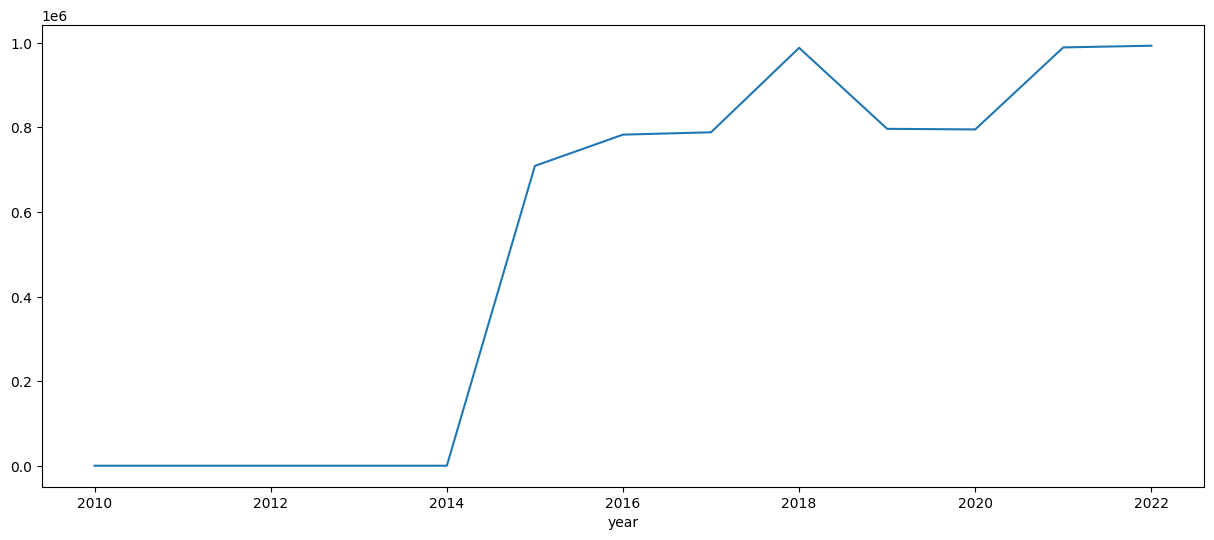

In [46]:
plt.figure(figsize=(15,6))
df_mean_1['ef_mean'].plot()
plt.show()

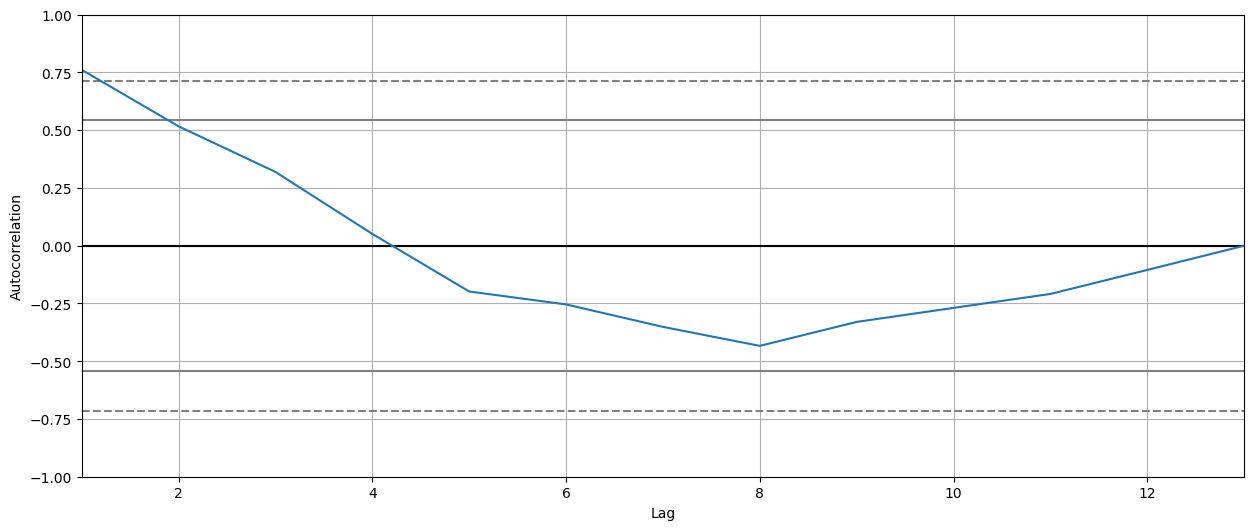

In [47]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(15,6))
autocorrelation_plot(df_mean_1['ef_mean'])
plt.show()

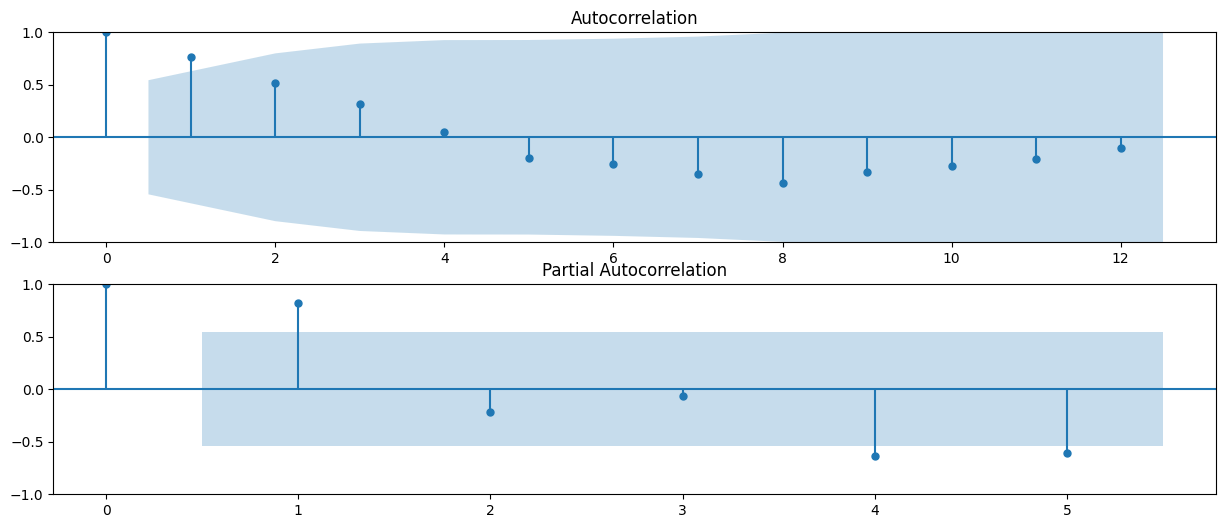

In [48]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_mean_1['ef_mean'],lags=12,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_mean_1['ef_mean'],lags=5,ax=ax2)

In [49]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_mean_1, order=(1, 1, 1)) 
results_ARIMA = model.fit()
results_ARIMA.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                ef_mean   No. Observations:                   13
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -165.189
Date:                Wed, 26 Apr 2023   AIC                            336.377
Time:                        17:55:50   BIC                            337.832
Sample:                    01-01-2010   HQIC                           335.839
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6948      2.322     -0.299      0.765      -5.245       3.856
ma.L1          0.8574      1.648      0.520      0.603      -2.373       4.088
sigma2      7.322e+10   1.42e-10   5.16e+20      0.000    7.32e+10    7.32e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):                18.41
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):       281051150.76   Skew:                             2.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.39e+37. Standard errors may be unstable.
"""

In [50]:
results_ARIMA.forecast(3)[0]

970662.5419692632

In [51]:
results_ARIMA.forecast(2)[1]

986163.565512615

In [52]:
df_mean_1['forecast']=results_ARIMA.predict()

In [53]:
df_mean_1

,ef_mean,forecast
year,,
2010,106.718283,0.000000e+00
2011,110.901566,1.196204e+02
2012,110.630297,1.007774e+02
2013,112.242245,1.190576e+02
2014,108.411974,1.053831e+02
2015,708893.620329,1.136365e+02
2016,782760.478127,8.183950e+05
2017,788349.288223,7.010946e+05
2018,987978.741200,8.589012e+05


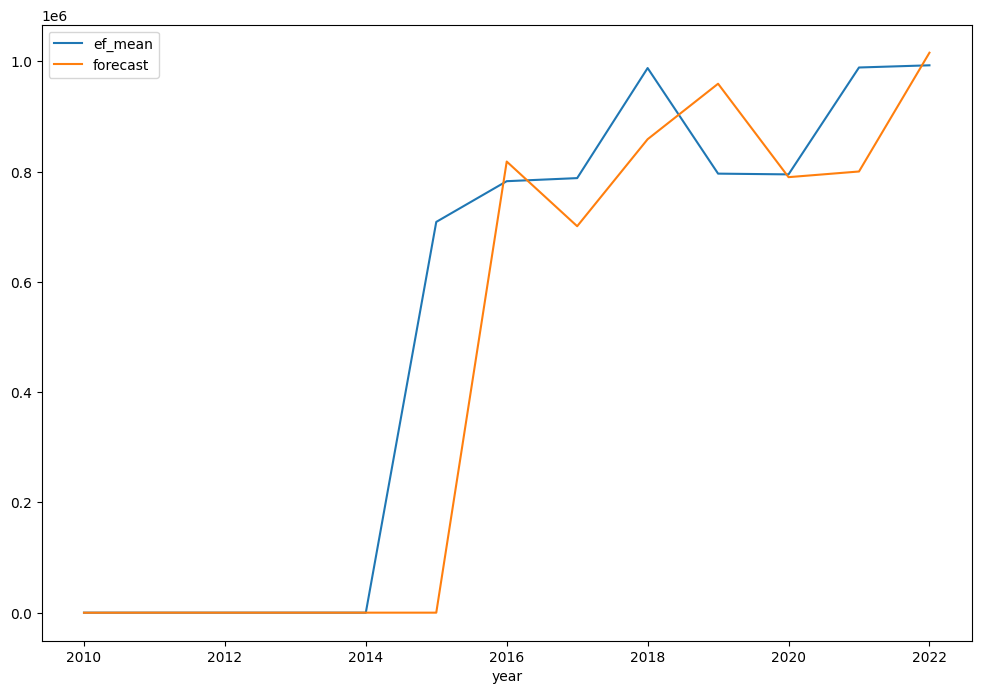

In [54]:
df_mean_1[['ef_mean','forecast']].plot(figsize=(12,8))
plt.show()

In [55]:
forecast_2023 = results_ARIMA.forecast(2)[0]

In [56]:
forecast_2023

970662.5419692632

In [57]:
forecast_2024 = results_ARIMA.forecast(2)[1]

In [58]:
forecast_2024

986163.565512615

In [59]:
forecast_2025 = results_ARIMA.forecast(3)[2]

In [60]:
forecast_2025

975393.3118842194

In [61]:
forecast_2026 = results_ARIMA.forecast(4)[3]

In [62]:
forecast_2026

982876.583095024

In [63]:
forecast_2027 = results_ARIMA.forecast(5)[4]

In [64]:
forecast_2027

977677.1374787374

In [65]:
df_mean_2 = df_mean_1.copy()

In [66]:
forecast_2023 = results_ARIMA.forecast(2)[0]
forecast_2024 = results_ARIMA.forecast(2)[1]
forecast_2025 = results_ARIMA.forecast(3)[2]
forecast_2026 = results_ARIMA.forecast(4)[3]
forecast_2027 = results_ARIMA.forecast(5)[4]

df_forecast = pd.DataFrame({
    'year': [2023, 2024, 2025, 2026, 2027],
    'ef_mean': [np.nan] * 5,
    'forecast': [forecast_2023, forecast_2024, forecast_2025, forecast_2026, forecast_2027]
})

df_mean_2 = df_mean_2.append(df_forecast, ignore_index=True)

print(df_mean_2)

          ef_mean      forecast    year
0      106.718283  0.000000e+00     NaN
1      110.901566  1.196204e+02     NaN
2      110.630297  1.007774e+02     NaN
3      112.242245  1.190576e+02     NaN
4      108.411974  1.053831e+02     NaN
5   708893.620329  1.136365e+02     NaN
6   782760.478127  8.183950e+05     NaN
7   788349.288223  7.010946e+05     NaN
8   987978.741200  8.589012e+05     NaN
9   796463.553292  9.595369e+05     NaN
10  795112.640147  7.900894e+05     NaN
11  988998.780819  8.003497e+05     NaN
12  992972.298005  1.015797e+06     NaN
13            NaN  9.706625e+05  2023.0
14            NaN  9.861636e+05  2024.0
15            NaN  9.753933e+05  2025.0
16            NaN  9.828766e+05  2026.0
17            NaN  9.776771e+05  2027.0


In [67]:
#years = list(range(2010, 2023))
#df_mean_2.loc[df_mean_2['year'].isna(), 'year'] = years
#df_mean_2.set_index('year', inplace=True)
#df_mean_2.info()

years = list(range(2010, 2023))
df_mean_2.loc[df_mean_2['year'].isna(), 'year'] = years
df_mean_2['year'] = df_mean_2['year'].astype(int)
df_mean_2.set_index('year', inplace=True)
df_mean_2.info()









<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 2010 to 2027
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ef_mean   13 non-null     float64
 1   forecast  18 non-null     float64
dtypes: float64(2)
memory usage: 432.0 bytes


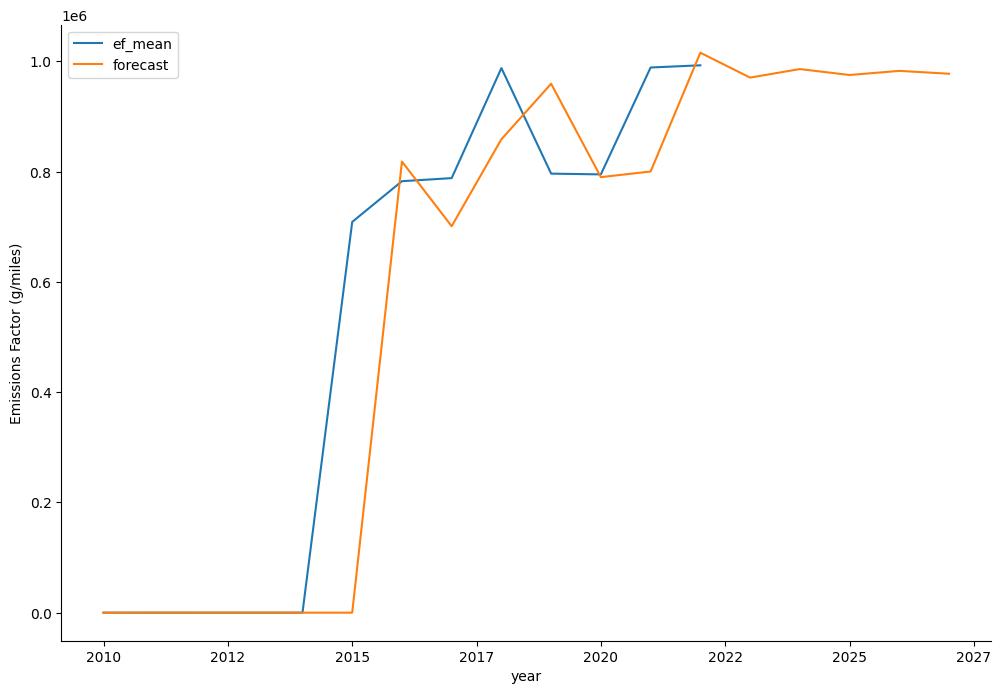

In [71]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# create the plot
ax = df_mean_2[['ef_mean','forecast']].plot(figsize=(12, 8))

# set tick label format to integers
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.ylabel('Emissions Factor (g/miles)')
# remove top and right spines

ax.spines['right'].set_visible(False)

ax.spines['top'].set_visible(False)

# display the plot
plt.show()
